In [1]:
from ase.build import bulk
import matplotlib.pyplot as plt

from dask.distributed import Client

from abtem import show_atoms, FrozenPhonons, Probe, Potential, GridScan, AnnularDetector

import os
os.environ["MKL_NUM_THREADS"] = "1"

from abtem import config
config.set({'lazy': True})
config.set({'device': 'cpu'})
config.set({'fft': 'fftw'})
config.set({'fftw.threads': 2})

Runtime: 1.5 s per frozen phonon on 8-core Intel(R) Core(TM) i9-9900K CPU @ 3.60GHz

In [2]:
client = Client()

In [12]:
atoms = bulk('Si', 'diamond', a=5.43, cubic=True)
atoms *= (2, 2, 2)

In [17]:
chunks = 500 # max number of wave functions in each chunk

frozen_phonons = FrozenPhonons(atoms, 16, {'Si': .0})

potential = Potential(frozen_phonons, 
                      gpts=256, 
                      projection='infinite', 
                      slice_thickness=2)

probe = Probe(energy=100e3, semiangle_cutoff=20, device='cpu')

scan = GridScan()

detectors = AnnularDetector(50, 150)

measurement = probe.scan(scan, detectors, potential, chunks=chunks)

In [18]:
%%time
measurement.compute()

Wall time: 24.4 s


(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x29a6aec5cd0>)

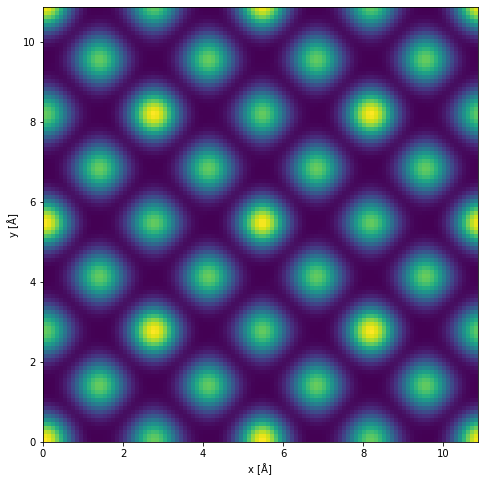

In [21]:
measurement.interpolate(.1).show(figsize=(8,8))